### $Import \  libraries$

In [ ]:
# import pandas as pd
import numpy  as np 



# Needed for figures
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import ipywidgets as widgets
from ipywidgets import interact, fixed, interactive, VBox, HBox
import matplotlib.animation as animation
import matplotlib.image as mpimg
%matplotlib notebook


###  $Run1$

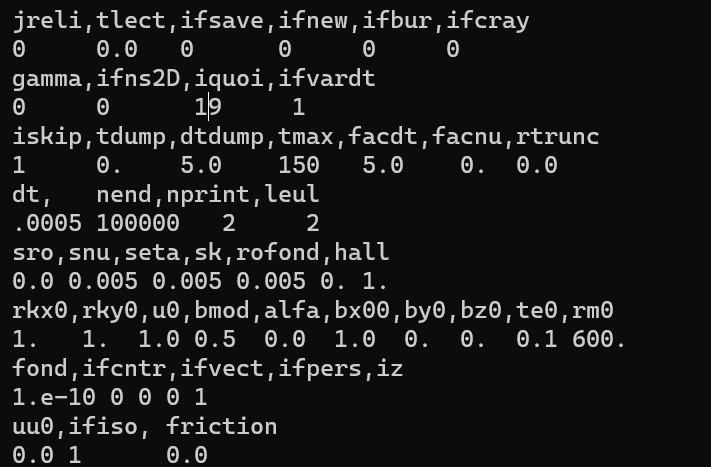

In [3]:
from IPython.display import Image
Image(filename=r'C:\Users\nikos.000\MHD1D\figures\run1.png') 

### $What \ I \ am \ getting \ when \ I \ run \ the \ code$

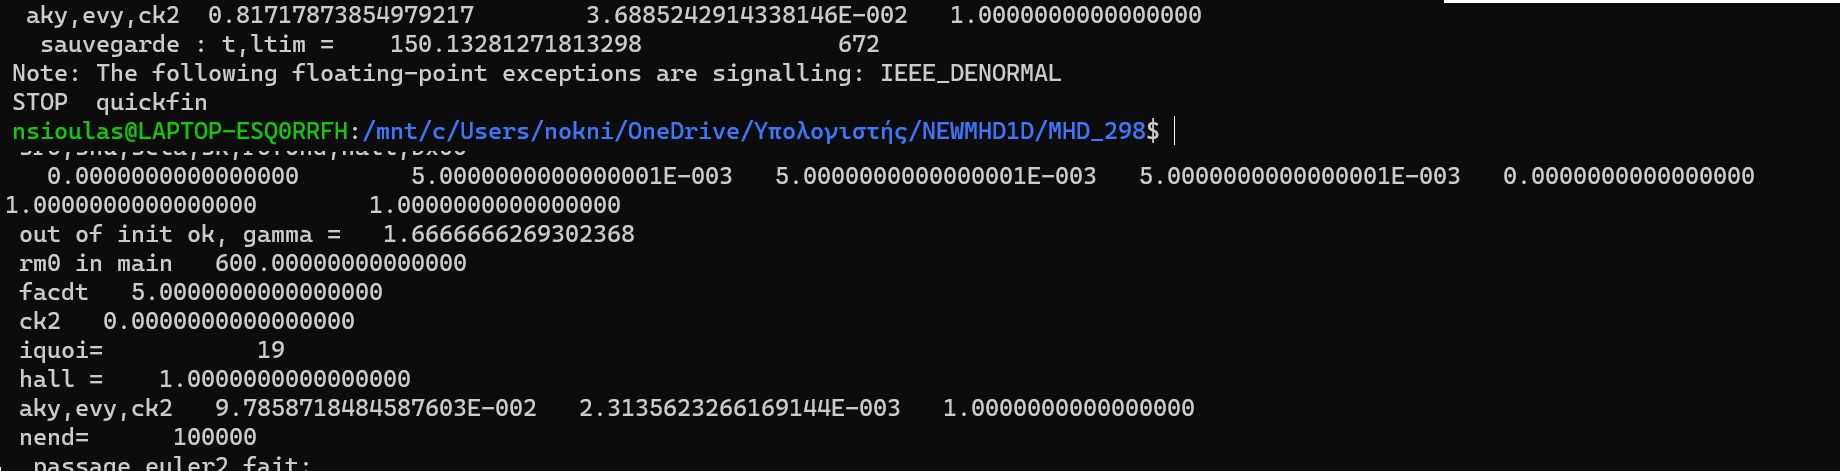

In [4]:
from IPython.display import Image
Image(filename=r'C:\Users\nikos.000\MHD1D\figures\run2.png') 

### $I \ still  \ get \ the \ error \ in \ the \ end$

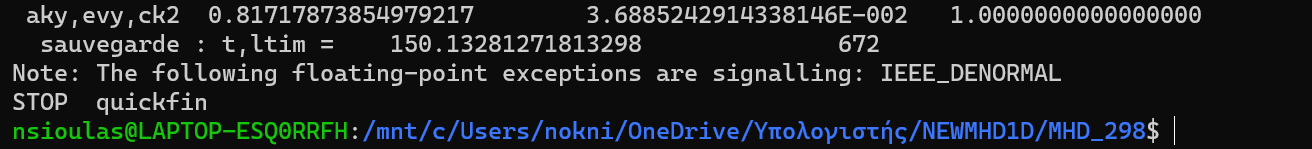

In [3]:
from IPython.display import Image
Image(filename=r'C:\Users\nikos.000\MHD1D\figures\run3.png') 

### $Define functions$

In [30]:
### Create subplots for specs21 ###

def subpl_21(input_df, df_col_name, n_rows,n_cols, fig_size, sharex=False):
    
    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, sharey=False,sharex=sharex, figsize=fig_size)
    fig.subplots_adjust(hspace = .15, wspace=.25)

    dt1  = n_rows*n_cols
    data = np.arange(0, dt1)

    for ax, i in zip(axs.ravel(), data):
        ax.plot(input_df.index, input_df[df_col_name[i]].values, linewidth =2, label   = df_col_name[i])
        ax.grid()  
        ax.legend(frameon=False,loc=2,fontsize=15,)
        ax.set_xlabel('$Time$',fontsize=18)
        ax.tick_params(axis='both',labelsize=15) 
        plt.grid()
    if resolution == 2048:
        fig.savefig(r'C:\Users\nikos.000\MHD1D\figures\jpg\res_2048\final\fort21_'+str(resolution)+'.jpg', format='jpg',dpi=300,bbox_inches='tight')
    elif resolution == 1024:
        fig.savefig(r'C:\Users\nikos.000\MHD1D\figures\jpg\res_1024\final\fort21_'+str(resolution)+'.jpg', format='jpg',dpi=300,bbox_inches='tight')
    else:
        fig.savefig(r'C:\Users\nikos.000\MHD1D\figures\jpg\res_4096\final\fort21_'+str(resolution)+'.jpg', format='jpg',dpi=300,bbox_inches='tight')
    
        
    


### Create subplots for specs22 ###

def subpl_22(input_df, df_col_name, n_rows,n_cols, fig_size, sharex=False):
    
    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, sharey=False,sharex=sharex, figsize=fig_size)
    fig.subplots_adjust(hspace = .15, wspace=.25)

    dt1  = n_rows*n_cols
    data = np.arange(0, dt1)

    for ax, i in zip(axs.ravel(), data):
        if i ==5:
            ax.plot(input_df.index, input_df[df_col_name[i]].values, linewidth =2, label   = df_col_name[i])
            ax.plot(input_df.index, input_df[df_col_name[i+1]].values, linewidth =2, label = df_col_name[i+1])
        else:
            ax.plot(input_df.index, input_df[df_col_name[i]].values, linewidth =2, label   = df_col_name[i])
        ax.grid()  
        ax.legend(frameon=False,loc=2,fontsize=15,)
        ax.set_xlabel('$Time$',fontsize=18)
        ax.tick_params(axis='both',labelsize=15) 
        plt.grid()
    if resolution == 2048:
        fig.savefig(r'C:\Users\nikos.000\MHD1D\figures\jpg\res_2048\final\fort22_'+str(resolution)+'.jpg', format='jpg',dpi=300,bbox_inches='tight')
    else:
        fig.savefig(r'C:\Users\nikos.000\MHD1D\figures\jpg\res_1024\final\fort22_'+str(resolution)+'.jpg', format='jpg',dpi=300,bbox_inches='tight')

        

        
### Create waterfall plot ###

def waterfall_plot(fig,ax,X,Y,Z,zlog):
    '''
    Make a waterfall plot
    Input:
        fig,ax : matplotlib figure and axes to populate
        Z : n,m numpy array. Must be a 2d array even if only one line should be plotted
        X,Y : n,m array
    '''
    # Set normalization to the same values for all plots
    zz = np.array(Z).reshape(np.size(Z),1)[:]
    zz =zz[zz>-1e10]
    zz =zz[zz<1e10]
    norm = plt.Normalize(min(zz), max(zz))
    # Check sizes to loop always over the smallest dimension
    n,m = Z.shape
    if n>m:
        X=X.T; Y=Y.T; Z=Z.T
        m,n = n,m

    for j in range(n):
        # reshape the X,Z into pairs 
        points = np.array([X[j,:], Z[j,:]]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)   
        if zlog ==1:
            lc = LineCollection(segments, cmap='plasma', norm=LogNorm())
        else:
             lc = LineCollection(segments, cmap='plasma', norm=norm)
        # Set the values used for colormapping
        lc.set_array((Z[j,1:]+Z[j,:-1])/2)
        lc.set_linewidth(2) # set linewidth a little larger to see properly the colormap variation
        line = ax.add_collection3d(lc,zs=(Y[j,1:]+Y[j,:-1])/2, zdir='y') # add line to axes

    fig.colorbar(lc) # add colorbar
    return segments
    
### Create 3D sequantial plot ###    
    
def threeD_plot(choose_column,quant,resolution,t_steps,zmax1,zmax,zlog,save_3D_movie,save_folder,elev=30., azim=150):
    ### Selected quantity ###
    quantity = choose_column
    col     = ['Density', '$V_{x}$', '$V_{y}$', '$V_{z}$','$B_{x}$', '$B_{y}$','$B_{z}$','$Temperature$']
    
    ### Create mesh ###
    dx    = 1
    x     = np.arange(0,resolution,dx)       # Resolution of grid
    ys    = np.arange(0,t_steps,dx)          # Number of timesteps
    new_z = np.zeros((t_steps,resolution))   # Selected quantity as a function of x,t
    

    ###  Plot figure ###
    
    fig = plt.figure( figsize=(15,10))
    
    ax = fig.add_subplot(111, projection='3d')

    for i in range(0,int(len(choose_file)/resolution)):
        new_z[i] = choose_column[i*resolution+i:resolution*(i+1)+i].values
            
    X,Y = np.meshgrid(x,ys)  # Create X, Y mesh
        
    ### Create waterfall plot ###
    
    save = waterfall_plot(fig,ax,X,Y,new_z, zlog) 
        
    ### Axes properties ###
    
    ax.set_xlabel('X') ; ax.set_xlim3d(0,resolution); ax.set_xlabel('X point')
    ax.set_ylabel('Y') ; ax.set_ylim3d(0,t_steps) ; ax.set_ylabel('Timestep')
    
    lims = np.array(new_z).reshape(np.size(new_z),1)[:]
    max1 = max(lims)
    min1 = min(lims)
    ax.set_zlabel('Z') ; ax.set_zlim3d(min1-0.01*min1,max1+0.01*max1); ax.set_zlabel(col[quant])
    ax.view_init(elev=elev, azim=azim)
    #plt.title('$Evolution  \ of  \ '+col[quant]+$', fontsize =24) ### column here
    
    #plt.colorbar(ax,shrink=0.7, aspect=20*0.7)
    fig.subplots_adjust(top=0.98)
    if save_3D_movie:
      ### Save 3D images ###
        for ii in range(0,360,40):
            ax.view_init(elev=20., azim=ii)
            fig.savefig(save_folder% ii, format='jpg',dpi=300,bbox_inches='tight')
    else:
            fig.savefig(save_folder+'elev_'+str(elev)+'azim_'+str(azim)+'.jpg', format='jpg',dpi=300,bbox_inches='tight')
            
            
            
### Create a movie for fort.23 ###

def subpl_23(input_df, column,every_n_tsteps,ymax1,ymax, n_rows,n_cols, 
             fig_size,save_folder,save_screenshot,colorbar,zlog,sharex=True,sharey= False):
    
    column1          = ['$ρ(x,τ)$', '$V_{x}(x,τ)$',  '$V_{y}(x,τ)$',
                   '$V_{z}(x,τ)$', '$B_{\perp}(x,τ)$', '$B_{y}(x,τ)$',
                   '$B_{z}(x,τ)$',     '$T(x,τ)$']

    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, sharey=False,sharex=sharex, figsize=fig_size)
    fig.subplots_adjust(hspace = .25, wspace=.15)

    # Number of subplots
    
    dt1  = n_rows*n_cols
    data = np.arange(0, dt1)
    x    = np.arange(0,resolution)
    for kk in range(0,t_steps,every_n_tsteps):
        
        first_time =0    # Show colorbar only the first time
        for ax, i in zip(axs.ravel(), data):
            ax.cla() # or ax.clear()
            if i== 4:
                ax.plot(np.arange(0,resolution),input_df[column[-1]][0*(resolution):(1)*resolution],color = 'black',ls='--' ,label = '$τ \  = \ 0$')
                ax.set_title(column1[i],fontsize=20)
            else:
                ax.plot(np.arange(0,resolution),input_df[column[i]][0*(resolution):(1)*resolution],color = 'black',ls='--' ,label = '$τ \  = \ 0$')
                ax.set_title(column1[i],fontsize=20)                    
            if kk>0:
                if i== 4:
                    y = input_df[column[-1]][kk*(resolution)+kk:(kk+1)*resolution+kk]
                else:
                    y = input_df[column[i]][kk*(resolution)+kk:(kk+1)*resolution+kk]
                if i ==0:
                    ymax1, ymax,ymin = False, 1.8, 0.5
                    
                else: 
                    ymax1, ymax,ymin = False, 1.8, 0.5
                Y = input_df[column[i]]
                waterfall_plot_2D(fig,ax,x,y,zlog, ymax1, ymax,ymin, colorbar,first_time)
                ax.set_title(column1[i],fontsize=20)
                first_time+=1
                
            ax.legend(frameon=False,loc=1,fontsize=15) 
            ax.tick_params(axis='both',labelsize=15)
            ax.grid()
            fig.suptitle("$Time =$ {}".format(specs21.index[kk]),fontsize=25)
        if save_screenshot:
            
            fig.savefig(save_folder% kk, format='jpg',dpi=300,bbox_inches='tight')
            
            
    plt.xlabel('$Time$',fontsize=18)
        
  

 ### Create 2D waterfall plot ###

from matplotlib.collections import LineCollection
from matplotlib.colors import LogNorm


def waterfall_plot_2D(fig,ax,X1,Y1,zlog, ymax1, ymax,ymin, colorbar,first_time):
    '''
    Make a waterfall plot
    Input:
        fig,ax : matplotlib figure and axes to populate
        X,Y : n,m array
    '''
    # Set normalization to the same values for all plots
    X = X1
    Y = Y1


    norm = plt.Normalize(min(Y), max(Y))
    
    # reshape the X,Y into pairs 
    points = np.array([X, Y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)   
    if zlog ==1:
        lc = LineCollection(segments, cmap='RdYlBu_r', norm=LogNorm(vmin =min(Y), vmax =max(Y)))
    else:
        lc = LineCollection(segments, cmap='RdYlBu_r', norm=norm)
    # Set the values used for colormapping
    lc.set_array(Y)
    lc.set_linewidth(2)
    line = ax.add_collection(lc)
    if colorbar:
        axbox  = ax.get_position()
        cbaxes = fig.add_axes([0.13, 0.68, 0.02, 0.17])
    ax.set_xlim([0,resolution])
    ax.set_ylim([min(Y)-0.25*1e-1*abs(min(Y)), max(Y) + 0.25*1e-1*abs(max(Y))])
    #ax.set_ylim([min(Y[Y>-1e10])-1e-2*abs(max(Y[Y>-1e10])), max(Y[Y>-1e10])+1e-2*abs(max(Y[Y>-1e10]))])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    

### Read files


In [32]:
### Change Directory for files ###
file_dir1 = r'C:\Users\nokni\OneDrive\Υπολογιστής\NewMHD1D\MHD_298\fort.21'
file_dir2 = r'C:\Users\nokni\OneDrive\Υπολογιστής\NewMHD1D\MHD_298\fort.22'
file_dir3 = r'C:\Users\nokni\OneDrive\Υπολογιστής\NewMHD1D\MHD_298\fort.23'
file_dir4 = r'C:\Users\nokni\OneDrive\Υπολογιστής\NewMHD1D\MHD_298\fort.24'
file_dir5 = r'C:\Users\nokni\OneDrive\Υπολογιστής\NewMHD1D\MHD_298\fort.49'
file_dir6 = r'C:\Users\nokni\OneDrive\Υπολογιστής\NewMHD1D\MHD_298\fort.50'


### Loads  files ###

### fort.21 ###
specs21 = pd.read_csv(file_dir1, sep=r'\s+', header=None, skiprows=1,
                    names=['$Time$','$Kinetic \ Energy$','$Magnetic \ Energy$','$Correlation \ V \cdot B$','$ Internal \ Energy$','$ρ_{rms}$','$Enstrophy$','$ Magn. \ Enstrophy$','$Temp. Enstrophy$'])
specs21 = specs21.set_index('$Time$')

### fort.22 ###
specs22 = pd.read_csv(file_dir2, sep=r'\s+', header=None, skiprows=1,
                    names=['$V_{a}$','$Time$','$Mach \ Number$','$U_{rms}$','$U_{s}$','$U_{c}$','$Z_{+}$','$Z_{-}$'])
specs22 = specs22.set_index('$Time$')

# fort.23 - needs column names ###
specs23 = pd.read_csv(file_dir3, header=None, skiprows = 3, sep=r'\s+',
                     names = ['$\rho$', '$V_{x}$', '$V_{y}$', '$V_{z}$','$B_{x}$', '$B_{y}$','$B_{z}$','$Temperature$'])
specs23['Bperp'] = np.sqrt(specs23['$B_{y}$']**2 + specs23['$B_{z}$']**2 )

### fort.24 ###
specs24 = pd.read_csv(file_dir4, header=0, skiprows = [1,2],sep=r'\s+')#,
#names = ['densite','temp','u','uc','b','e+','e-','ev-eb','e+-e-'])


### fort.49 ###
specs49 = pd.read_csv(file_dir5, sep=r'\s+', header=None)#,
#                    names = ['?','??','???','????'])

### fort.50 ###
specs50= pd.read_csv(file_dir6, sep=r'\s+', header=None, names = ['Temperature', 'Density', 'By', 'Bz'])

### Estimate $τ_{NL}$

In [12]:
from scipy import integrate as intg


### Load desired df ###
choose_file   = specs23          # Choose file betwenn specs21, specs22,...

quant         = 0               #  Choose between 0,1,...,according to the following list

column        = ['$\rho$', '$V_{x}$', '$V_{y}$', '$V_{z}$','$B_{x}$', '$B_{y}$','$B_{z}$','$Temperature$']

choose_column = choose_file[column[quant]] 

resolution    = len(specs50)                               # Specify resolution of grid in MHD simulation

t_steps       = int(len(specs23)/resolution)               # Specify number of timesteps in MHD simulation

ymax1         = False
ymax          = 1.6


def estimate_integral(input_array, resolution, t_steps, ymax1, ymax):
    
    ### Create mesh ###
    dx      = 1
    xdata2   = np.arange(1,resolution+1,dx)*2*np.pi
    xdata   = np.arange(1,resolution+1,dx)*2*np.pi       # Resolution of grid
    ydata   = np.arange(0,t_steps,dx)          # Number of timesteps
    new_z   = np.zeros((t_steps,resolution))   # Selected quantity as a function of x,t
    d_quant = np.zeros((t_steps,resolution))
    for kk in range (0,t_steps):
        new_z[kk] = input_array[kk*resolution+kk:(kk+1)*resolution+kk]

    if ymax1==1:
        for i in range (0,t_steps):
            for k in range (0,resolution):
                if new_z[i,k] > ymax:
                    new_z[i,k]  = np.mean(new_z[i,k-10:k+10])
            d_quant[i,:] = (new_z[i] - new_z[0])**2
    else:
        for i in range (0,t_steps):
            d_quant[i,:] = (new_z[i] - new_z[0])**2
            
    tnl = (intg.trapz(xdata,d_quant)/intg.trapz(xdata,new_z[0,:]**2))*100
    tnl2 = (intg.trapz(xdata2,d_quant)/intg.trapz(xdata2,new_z[0,:]**2))*100
    
    return tnl,tnl2, d_quant,new_z

tnl,tnl2,d_quant,new_z = estimate_integral(choose_column, resolution, t_steps, ymax1, ymax)

## Plot $τ_{NL}$

Text(0.5, 0, '$ Time$')

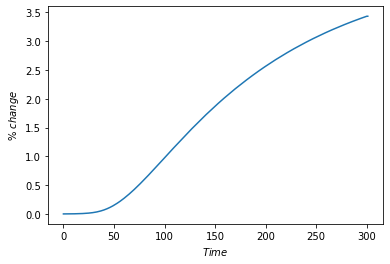

In [35]:
plt.plot(tnl2)
plt.ylabel('$ \%  \ change$')
plt.xlabel('$ Time$')

### Coments:

The code blows up very early, thus, we can not estimate $τ_{NL}$

### $Plot  \ initial  \ soliton \  profile \ -- \ fort.50$

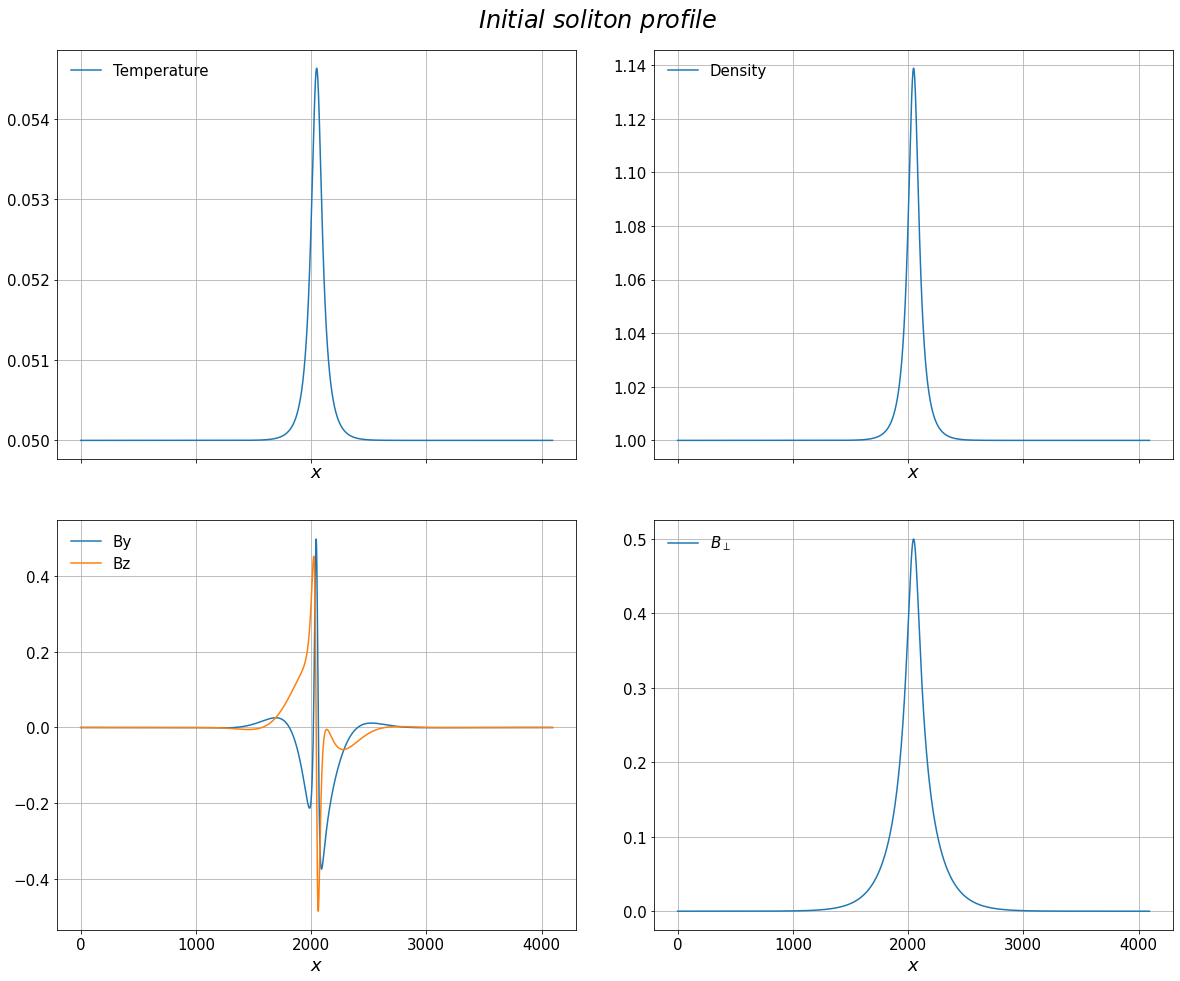

In [10]:

# Plot results
resolution = len(specs50)

names = ['Temperature', 'Density', 'By', 'Bz']
symbs = ['$T(x)$', '$n(x)$', '$B_{x}(x)$','$B_{z}(x)$' ]

fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(20,15))
fig.subplots_adjust(hspace = .15, wspace=.15)

data = np.arange(0, len(np.array(names)))
for ax, d in zip(axs.ravel(), data):
    #ax.scatter(t, sol[:, 0],linewidth =0.5, label ='RK4, Δx ='+str(dt)+'' )#,label = sorbit[k-1],marker=markers[k-1])
    if (d !=2) & (d !=3) :
        ax.plot(specs50[names[d]], label = names[d])
    if d ==2:
        ax.plot(specs50[names[d]], label = names[d])
        ax.plot(specs50[names[d+1]], label = names[d+1])
    if d ==3:
        ax.plot(np.sqrt(specs50[names[d]]**2 + specs50[names[d-1]]**2), label = '$B_{\perp}$')
        

    ax.grid()  
    ax.legend(frameon=False,loc=2,fontsize=15,)
    ax.set_xlabel('$x$',fontsize=18)
    #ax.set_ylabel(symbs[d],fontsize=18)
    ax.tick_params(axis='both',labelsize=15) 
    #ax.set_ylim([0,8])
    plt.grid()
fig.suptitle('$Initial \ soliton \ profile$',fontsize=24)
fig.subplots_adjust(top=0.94)
        
if resolution == 2048:
    fig.savefig(r'C:\Users\nikos.000\MHD1D\figures\jpg\res_2048\final\initial_profile_resol_'+str(resolution)+'.jpg', format='jpg',dpi=300,bbox_inches='tight')
elif resolution == 1024:
    fig.savefig(r'C:\Users\nikos.000\MHD1D\figures\jpg\res_1024\final\initial_profile_resol_'+str(resolution)+'.jpg', format='jpg',dpi=300,bbox_inches='tight')
else:
    fig.savefig(r'C:\Users\nikos.000\MHD1D\figures\jpg\res_4096\final\initial_profile_resol_'+str(resolution)+'.jpg', format='jpg',dpi=300,bbox_inches='tight')

    

### $Fort.21$ 

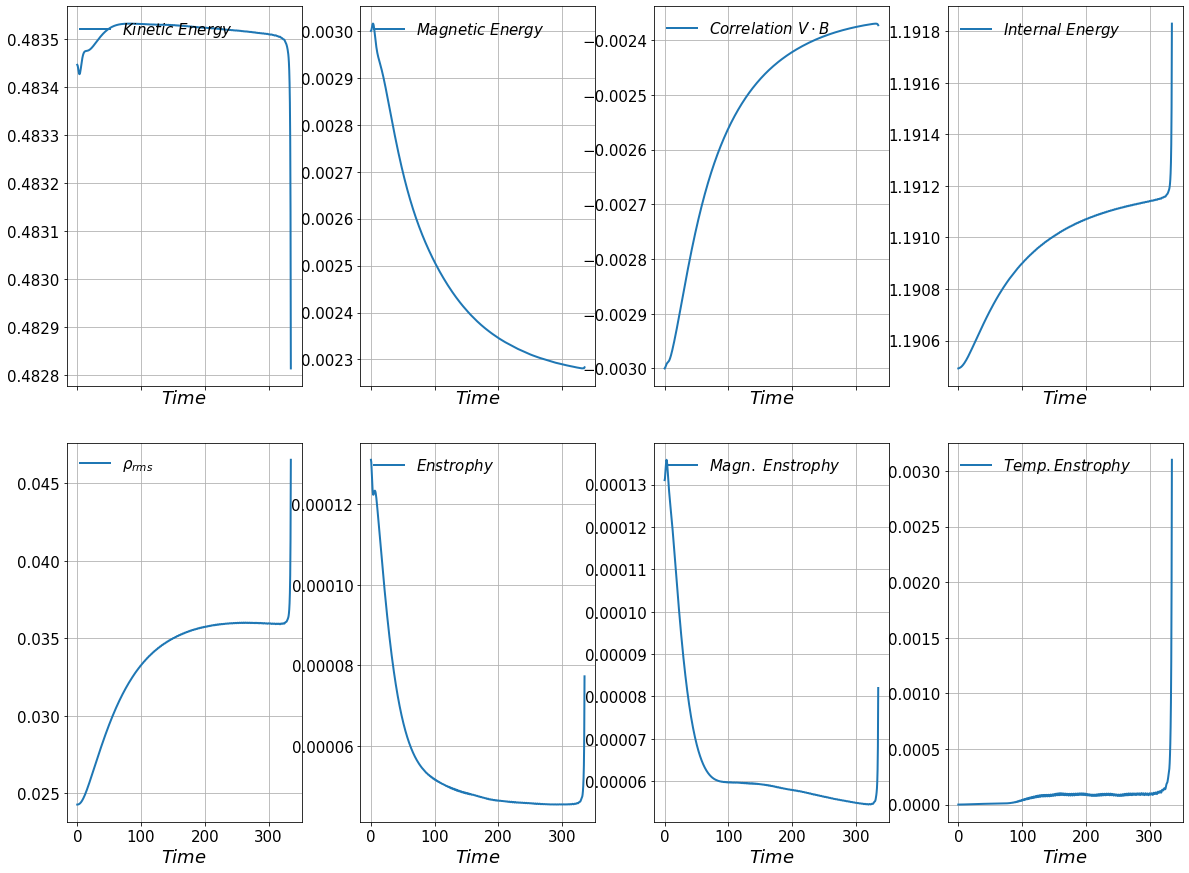

In [33]:
### Input parameters ###

input_df      = specs21
df_col_name   = ['$Kinetic \ Energy$','$Magnetic \ Energy$','$Correlation \ V \cdot B$','$ Internal \ Energy$','$ρ_{rms}$','$Enstrophy$','$ Magn. \ Enstrophy$','$Temp. Enstrophy$']

n_rows,n_cols = 2,4
sharex        = True
fig_size      = (20,15)

### Plot figure ###
subpl_21(input_df, df_col_name, n_rows,n_cols, fig_size, sharex=True)



### $Fort.22$

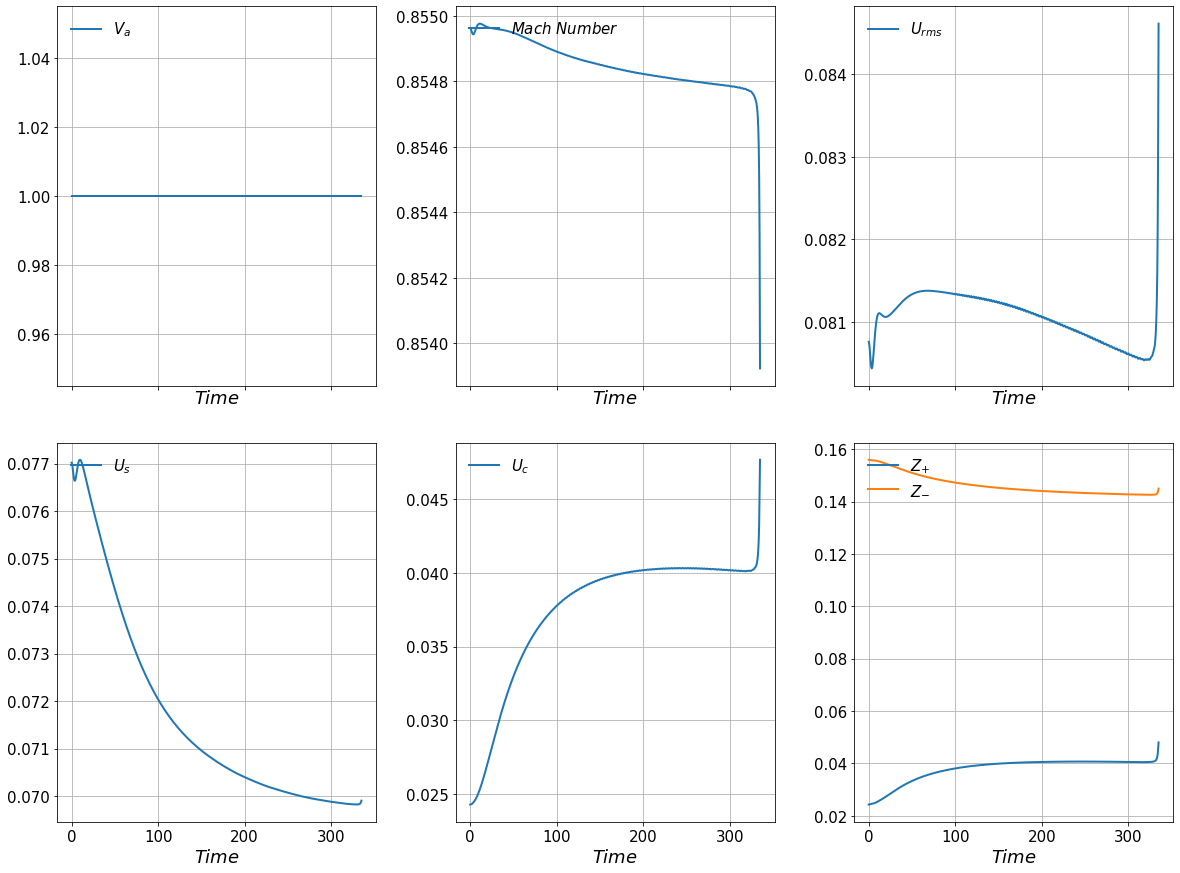

In [34]:
### Input parameters ###

input_df      = specs22
df_col_name   = ['$V_{a}$','$Mach \ Number$','$U_{rms}$','$U_{s}$','$U_{c}$','$Z_{+}$','$Z_{-}$']
n_rows,n_cols = 2,3
sharex        = True
fig_size      = (20,15)

### Plot figure ###
subpl_22(input_df, df_col_name, n_rows,n_cols, fig_size, sharex=True)

### $Plot \ 2D \ sequential \ figures \ of  \ fort.23$

In [ ]:
beta             =  0.2
choose_file      = specs23                            # Choose file betwenn specs21, specs22,...

quant            = 0                                  # Choose between 0,1,...,according to the following list

column           = ['$\rho$', '$V_{x}$',  '$V_{y}$',
                   '$V_{z}$', '$B_{x}$', '$B_{y}$',
                   '$B_{z}$',     '$Temperature$']

choose_column    = choose_file[column[quant]] 

resolution       = len(specs50)                       # Specify resolution of grid in MHD simulation
t_steps          = int(len(choose_file)/resolution)   # Specify number of timesteps in MHD simulation
fig_size         = (25,15)
n_rows,n_cols    = 2,4
every_n_tsteps   = 4                                  # Plot lines every n steps
ymax1            = False
ymax             = 1.8
zlog             = False
save_folder      = r'C:\Users\nikos.000\MHD1D\figures\jpg\test1\_secs23_2D%d.jpg' ## change here

if resolution == 2048:
    save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_2048\final\formovie\_beta_'+str(beta)+'secs23_2D%d.jpg' ## change here   
elif resolution == 1024:
    save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_1024\final\formovie\_beta_'+str(beta)+'secs23_2D%d.jpg' ## change here 
else:
    save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_4096\final\formovie\_beta_'+str(beta)+'secs23_2D%d.jpg' ## change here 
    
    
    
colorbar           = False
save_screenshot    = True
sharey             = False



subpl_23(choose_file, column,every_n_tsteps,ymax1,ymax, n_rows,n_cols, fig_size, save_folder, save_screenshot,colorbar,zlog, sharex=True,sharey= False)

###  $Create \ fort.23 \ movie$

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import matplotlib.image as mpimg
%matplotlib notebook

#= r'C:\Users\nikos.000\MHD1D\figures\jpg\res_2048\final\formovie\_beta_'+str(beta)+'secs23_2D%d.jpg'

if resolution == 2048:
    save_folder2   = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_2048\final\formovie\_beta_'+str(beta)+'secs23_2D%d.jpg' ## change here
    save_folder3   = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_2048\final\movie\_beta_'+str(beta)+'spec23_mov' ## change here
elif resolution == 1024 :
    save_folder2   = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_1024\final\formovie\_beta_'+str(beta)+'secs23_2D%d.jpg' ## change here 
    save_folder3   = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_1024\final\movie\_beta_'+str(beta)+'spec23_mov' ## change here
else:
    save_folder2   = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_4096\final\formovie\_beta_'+str(beta)+'secs23_2D%d.jpg' ## change here 
    save_folder3   = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_4096\final\movie\_beta_'+str(beta)+'spec23_mov' ## change here



every_n_tsteps =8
steps = np.arange(0,t_steps,every_n_tsteps)
img = []
for k in steps:
    img.append(mpimg.imread(save_folder2% k) ) #path file
                         
frames = [] # for storing the generated images
fig = plt.figure()
for i in range(len(img)):
    frames.append([plt.imshow(img[i], cmap=cm.Greys_r,animated=True, aspect='auto')])

ani = animation.ArtistAnimation(fig, frames, interval=500, blit=True,
                                repeat_delay=200000)

plt.axis('off')
#ani.save(save_folder3+'.mp4', bbox_inches='tight')
ani.save(save_folder3+'.gif',dpi=300, savefig_kwargs = dict(transparent = False))
plt.show()

### $Create \ stack \ plot\ of fort.23$ ###

In [ ]:
import matplotlib.pylab as plt
import matplotlib.colors 
import matplotlib as mpl
import seaborn as sns

### Change the parameters here to save the file ###
polar = 'RHP_waveb_'
polara = 'RHP wave, β='
beta  = 0.6
BS    = 0.5

choose_file      = specs23                            # Choose file betwenn specs21, specs22,...

quant            = 0                                  # Choose between 0,1,...,according to the following list

column           = ['$\rho$', '$V_{x}$',  '$V_{y}$',
                   '$V_{z}$', '$B_{x}$', '$B_{y}$',
                   '$B_{z}$',     '$Temperature$']

choose_column    = choose_file[column[quant]] 

resolution       = len(specs50)                       # Specify resolution of grid in MHD simulation
t_steps          = int(len(choose_file)/resolution)   # Specify number of timesteps in MHD simulation
fig_size         = (25,15)
n_rows,n_cols    = 2,4
every_n_tsteps   = 7                                 # Plot lines every n steps
hm               = 32

fig = plt.figure( figsize=(15,10))
ax = fig.add_subplot()
save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\test\_test'
new = np.arange(0,t_steps,every_n_tsteps)

### Add colorbar ###

cmap = mpl.cm.ScalarMappable(norm = matplotlib.colors.Normalize(vmin = specs21.index.min(), vmax = specs21.index.max(), clip = False), cmap=mpl.cm.turbo)
c    = np.linspace(specs21.index.min(),specs21.index.max(),len(specs21))


for kk in range(0,t_steps,every_n_tsteps):
    #if kk ==new[-1]:
        #ax.plot(np.arange(0,resolution),specs23['Bperp'][kk*(resolution)+kk:(kk+1)*resolution+kk]+kk/hm, color=cmap.to_rgba(c[kk]),linewidth=0.5,label=polar+str(beta))
    ax.plot(np.arange(0,resolution),specs23['Bperp'][kk*(resolution)+kk:(kk+1)*resolution+kk]+kk/hm, color=cmap.to_rgba(c[kk]),linewidth=0.5)

    
### Set color bar position  and size, label###

axbox = ax.get_position()
cbaxes = fig.add_axes([0.68, 0.82, 0.2, 0.02]) 
cbar=fig.colorbar(cmap, cax=cbaxes, ticks=c, orientation='horizontal', pad=5)
cbar.set_ticks(np.linspace(specs21.index.min(),specs21.index.max(),4))
cbar.ax.set_title('$Time$', fontsize=15 )
cbar.ax.tick_params(labelsize=13)
    
    
### Add text ###

ax.text(0.11, 0.95,polara+str(beta),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes,fontsize =20)
    
ax.set_xlim(0,resolution) 
#ax.legend(frameon=False,loc=2,fontsize=15) 
ax.tick_params(axis='both',labelsize=15)
ax.set_xlabel('$x$',fontsize =20)
ax.set_ylabel('$|B|$',fontsize =20)
#fig.colorbar(cmap)
fig.show()     
fig.savefig(save_folder+polar+str(beta)+str(BS)+'.jpg', format='jpg',dpi=300,bbox_inches='tight')
    

### Combine stackplots

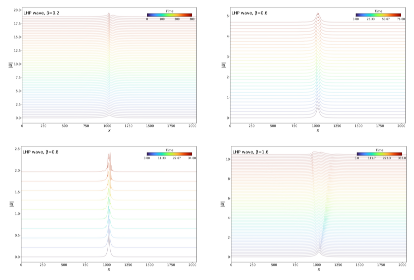

In [37]:
#FIG 12

## FIG9 ##

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpimg
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


### Change here ###

polari = 'RH'


## get savd pngs ##

img1 = mpimg.imread(r'C:\Users\nikos.000\MHD1D\figures\jpg\test\_testLHP_ waveb_0.20.5.jpg')
img2 = mpimg.imread(r'C:\Users\nikos.000\MHD1D\figures\jpg\test\_testLHP_waveb_0.60.5.jpg')
img3 = mpimg.imread(r'C:\Users\nikos.000\MHD1D\figures\jpg\test\_testLHP_waveb_0.80.5.jpg')
img4 = mpimg.imread(r'C:\Users\nikos.000\MHD1D\figures\jpg\test\_testLHP_ waveb_1.60.5.jpg')


size_f=24
labels = ("", "", "", "")
fig = plt.figure()
gs = gridspec.GridSpec(2, 8,wspace=0.01,hspace=0.02)
#gs.update(wspace=0.15)
ax1 = fig.add_subplot(gs[0, :4], )
ax2 = fig.add_subplot(gs[0, 4:])
ax3 = fig.add_subplot(gs[1, :4], )
ax4 = fig.add_subplot(gs[1, 4:])
#ax3 = fig.add_subplot(gs[1, 1:3])
ax1.imshow(img1)
ax1.text(-0.02, 0.95, labels[0], transform=ax1.transAxes, fontsize=13, fontweight='normal', va='top', ha='right')
ax2.imshow(img2)
ax2.text(-0.02, 0.95, labels[1], transform=ax2.transAxes, fontsize=13, fontweight='normal', va='top', ha='right')
ax3.imshow(img3)
ax3.text(-0.02, 0.95, labels[2], transform=ax3.transAxes, fontsize=13, fontweight='normal', va='top', ha='right')
ax4.imshow(img4)
ax4.text(-0.02, 0.95, labels[3], transform=ax4.transAxes, fontsize=13, fontweight='normal', va='top', ha='right')
ax1.axis('off')
ax2.axis('off')

ax3.axis('off')
ax4.axis('off')
#fig.subplots_adjust(wspace=0.03)
#fig.subplots_adjust(hspace=0.03)  
gs.tight_layout(fig)
#fig.tight_layout()
#fig.subplots_adjust(bottom=0.5)
#plt.subplots_adjust(top=0.82, bottom=0.08, left=0.40, right=0.95, hspace=0.05,
                       # wspace=0.05)

fig.savefig(r'C:\Users\nikos.000\MHD1D\figures\jpg\test\combined'+str(polari)+'.jpg', format='jpg',dpi=300,bbox_inches='tight')

# $Find \ B_{max} \ at \ each \ timestep$

 ### Create DF's -- plot temporary figures

In [ ]:
save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\test\_Bmax_'
choose_file      = specs23                            # Choose file betwenn specs21, specs22,...

quant            = 0                                  # Choose between 0,1,...,according to the following list

column           = ['$\rho$', '$V_{x}$',  '$V_{y}$',
                   '$V_{z}$', '$B_{x}$', '$B_{y}$',
                   '$B_{z}$',     '$Temperature$']

choose_column    = choose_file[column[quant]] 

resolution       = len(specs50)                       # Specify resolution of grid in MHD simulation
t_steps          = int(len(choose_file)/resolution)   # Specify number of timesteps in MHD simulation
fig_size         = (25,15)
n_rows,n_cols    = 2,4
every_n_tsteps   = 1                                 # Plot lines every n steps
hm               = 64

fig = plt.figure( figsize=(15,10))
ax = fig.add_subplot()
save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\test\_test'
dir1           = r'C:\Users\nikos.000\MHD1D\figures\jpg\test\dfs_bmax\_'+polar+str(beta)+str(BS)+'.csv'
new  = np.arange(0,t_steps,every_n_tsteps)
Bmax = np.zeros(len(specs21))
time_Bmax = specs21.index.values
for kk in range(0,t_steps):
    Bmax[kk] = specs23['Bperp'][kk*(resolution)+kk:(kk+1)*resolution+kk].max()
    
    

ax.plot(time_Bmax,Bmax, color = 'black',ls='-.',linewidth=0.5)

ax.legend(frameon=False,loc=1,fontsize=15) 
ax.tick_params(axis='both',labelsize=15)
ax.set_xlabel('$Time$',fontsize =15)
ax.set_ylabel('$|B|_{max}$',fontsize =15)

fig.show()     
fig.savefig(save_folder+polar+str(beta)+str(BS)+'.jpg', format='jpg',dpi=300,bbox_inches='tight')

Bmax_df = pd.DataFrame({'Time' :time_Bmax,
                        'Bmax' :  Bmax})   


Bmax_df.to_csv(dir1)  
 
    

### Load DataFrame's - Create figure 6 from Buti et al.

<ipython-input-36-0b90ad61021e>:61: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


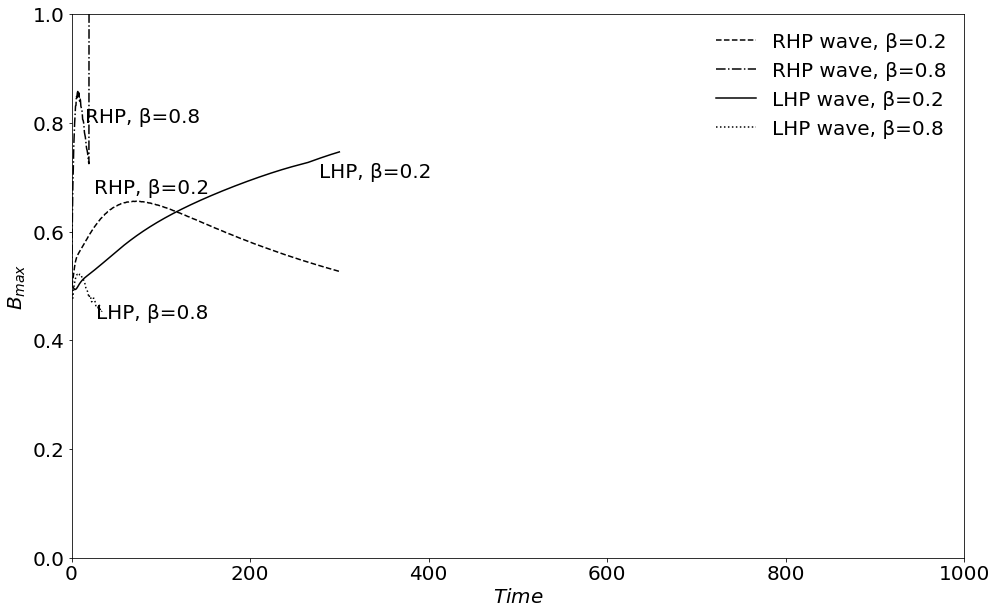

In [36]:
### Directories where I have store DF's with Bmax and time

beta = [0.2,  0.8]
BS   = 0.5 
polar= ['RHP wave, β=','LHP wave, β=', ]

dir1           = r'C:\Users\nikos.000\MHD1D\figures\jpg\test\dfs_bmax\_'+polar[0]+str(beta[0])+str(BS)+'.csv'
dir2           = r'C:\Users\nikos.000\MHD1D\figures\jpg\test\dfs_bmax\_'+polar[0]+str(beta[1])+str(BS)+'.csv'
dir3           = r'C:\Users\nikos.000\MHD1D\figures\jpg\test\dfs_bmax\_'+polar[1]+str(beta[0])+str(BS)+'.csv'
dir4           = r'C:\Users\nikos.000\MHD1D\figures\jpg\test\dfs_bmax\_'+polar[1]+str(beta[1])+str(BS)+'.csv'
save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\test\_test'

fig = plt.figure( figsize=(16,10))
ax = fig.add_subplot()

B_RHP_2 = pd.read_csv(dir1, sep=',')
B_RHP_8 = pd.read_csv(dir2, sep=',')
B_LHP_2 = pd.read_csv(dir3, sep=',')
B_LHP_8 = pd.read_csv(dir4, sep=',')

ax.plot(B_RHP_2['Time'].values,B_RHP_2['Bmax'].values,color='black',ls='--',label=polar[0]+str(beta[0]))
ax.plot(B_RHP_8['Time'].values,B_RHP_8['Bmax'].values,color='black',ls= 'dashdot',label=polar[0]+str(beta[1]))
ax.plot(B_LHP_2['Time'].values,B_LHP_2['Bmax'].values,color='black',label=polar[1]+str(beta[0]))
ax.plot(B_LHP_8['Time'].values,B_LHP_8['Bmax'].values,color='black',ls= 'dotted',label=polar[1]+str(beta[1]))

ax.set_ylabel('$B_{max}$', fontsize =20)
ax.set_xlabel('$Time$', fontsize =20)
ax.set_ylim([0,1])
ax.legend(frameon=False,loc=1,fontsize=20) 
ax.tick_params(axis='both',labelsize=20)

### Add text ###

polar= ['RHP, β=','LHP, β=', ]

ax.text(0.09, 0.68,polar[0]+str(beta[0]),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes,fontsize =20)



ax.text(0.34, 0.71,polar[1]+str(beta[0]),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes,fontsize =20)



ax.text(0.09, 0.45,polar[1]+str(beta[1]),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes,fontsize =20)

ax.text(0.08, 0.81,polar[0]+str(beta[1]),
     horizontalalignment='center',
     verticalalignment='center',
     transform = ax.transAxes,fontsize =20)
ax.set_xlim([0,1000])

fig.show()
fig.savefig(save_folder+'all_four.jpg', format='jpg',dpi=300,bbox_inches='tight')


# Figures I have not used in the presentation

##  $Evolution  \ of  \  n(x,t)$

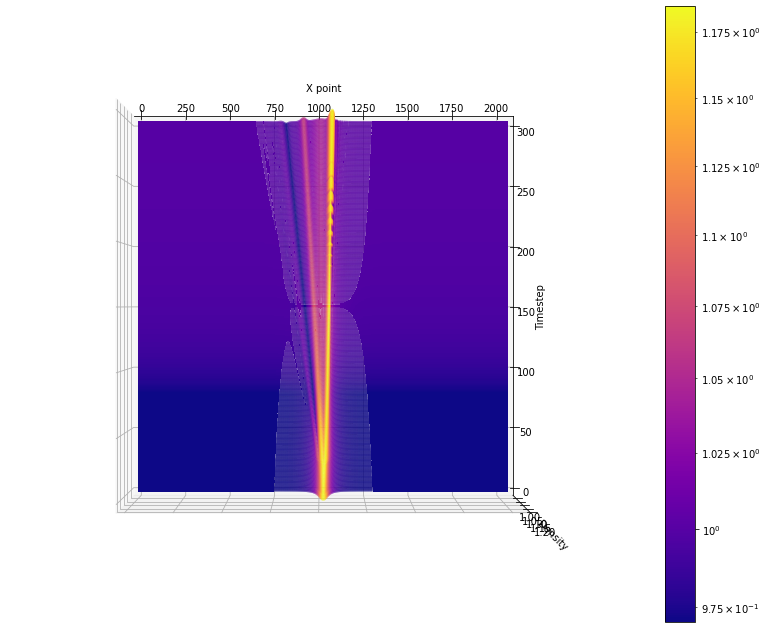

In [31]:

choose_file   = specs23          # Choose file betwenn specs21, specs22,...

quant         = 0               #  Choose between 0,1,...,according to the following list

column        = ['$\rho$', '$V_{x}$', '$V_{y}$', '$V_{z}$','$B_{x}$', '$B_{y}$','$B_{z}$','$Temperature$']

choose_column = choose_file[column[quant]] 
                               
resolution    = len(specs50)                               # Specify resolution of grid in MHD simulation

t_steps       = int(len(specs23)/resolution)               # Specify number of timesteps in MHD simulation

zmax1 = 0                    # Maximum or not
zmax  = 1.5                  # Maximum allowed value of selected quantity
zlog  = 1                    # Log z axis =1

save_3D_movie = False

if resolution == 2048:
    save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_2048\final\_3d_density%d.jpg' ## change here
else:
    save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_1024\final\_3d_density%d.jpg' ## change here 


threeD_plot(choose_column,quant,resolution,t_steps,zmax1,zmax,zlog,save_3D_movie,save_folder,elev=90., azim=270)


        

##  $Evolution  \ of  \ V_{x}(x,t)$

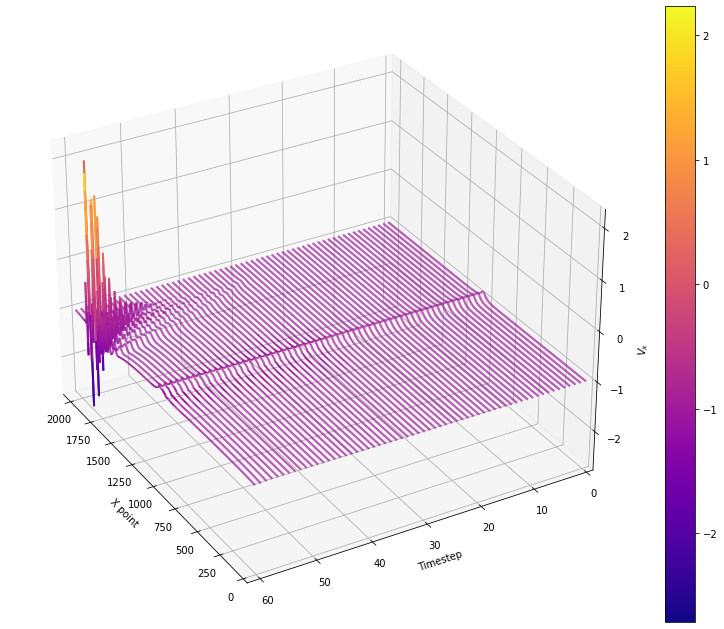

In [53]:
choose_file   = specs23          # Choose file betwenn specs21, specs22,...

quant         = 1               #  Choose between 0,1,...,according to the following list

column        = ['$\rho$', '$V_{x}$', '$V_{y}$', '$V_{z}$','$B_{x}$', '$B_{y}$','$B_{z}$','$Temperature$']


choose_column = choose_file[column[quant]] 
                               
resolution    = len(specs50)                                       # Specify resolution of grid in MHD simulation

t_steps       = int(len(specs23)/resolution)              # Specify number of timesteps in MHD simulation
zmax1 = 0                         # Maximum or not?
zmax = 5                         # Maximum allowed value of selected quantity
zlog = 0                         # Log z axis =1

save_3D_movie = False

if resolution == 2048:
    save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_2048\final\_3d_vx%d.jpg' ## change here
else:
    save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_1024\final\_3d_vx%d.jpg' ## change here 




threeD_plot(choose_column,quant,resolution,t_steps,zmax1,zmax,zlog,save_3D_movie,save_folder,elev=30., azim=150)


        

##  $Evolution  \ of  \ V_{y}(x,t)$

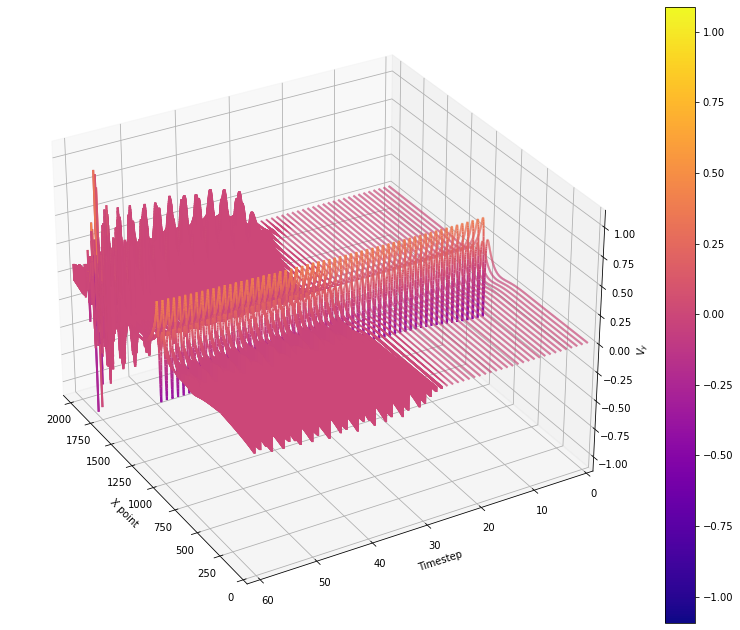

In [58]:
choose_file   = specs23          # Choose file betwenn specs21, specs22,...

quant         = 2               #  Choose between 0,1,...,according to the following list

column        = ['$\rho$', '$V_{x}$', '$V_{y}$', '$V_{z}$','$B_{x}$', '$B_{y}$','$B_{z}$','$Temperature$']


choose_column = choose_file[column[quant]] 
                               
resolution    = len(specs50)                                    # Specify resolution of grid in MHD simulation

t_steps       = int(len(choose_column)/resolution)              # Specify number of timesteps in MHD simulation
zmax1         = 0                                               # Maximum or not?
zmax          = 5                                               # Maximum allowed value of selected quantity
zlog          = 0                                               # Log z axis =1

save_3D_movie = False

if resolution == 2048:
    save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_2048\final\_3d_vy%d.jpg' ## change here
else:
    save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_1024\final\_3d_vy%d.jpg' ## change here 




threeD_plot(choose_column,quant,resolution,t_steps,zmax1,zmax,zlog,save_3D_movie,save_folder,elev=30., azim=150)



##  $Evolution  \ of  \ V_{z}(x,t)$

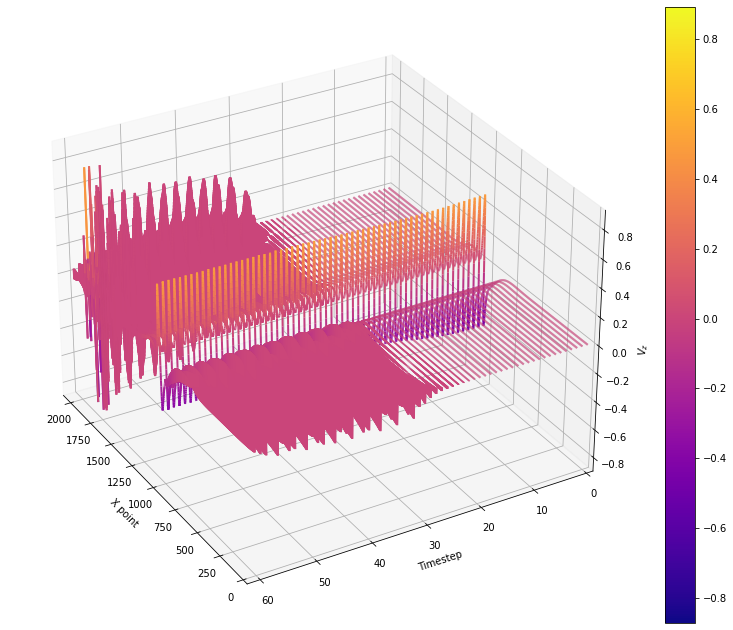

In [61]:
choose_file   = specs23          # Choose file betwenn specs21, specs22,...

quant         = 3               #  Choose between 0,1,...,according to the following list

column        = ['$\rho$', '$V_{x}$', '$V_{y}$', '$V_{z}$','$B_{x}$', '$B_{y}$','$B_{z}$','$Temperature$']


choose_column = choose_file[column[quant]] 
                               
resolution    = len(specs50)                                         # Specify resolution of grid in MHD simulation

t_steps       = int(len(choose_column)/resolution)              # Specify number of timesteps in MHD simulation
zmax1         = 0                                               # Maximum or not?
zmax          = 5                                               # Maximum allowed value of selected quantity
zlog          = 0                                               # Log z axis =1

save_3D_movie = False
if resolution == 2048:
    save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_2048\final\_3d_vz%d.jpg' ## change here
else:
    save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_1024\final\_3d_vz%d.jpg' ## change here 




threeD_plot(choose_column,quant,resolution,t_steps,zmax1,zmax,zlog,save_3D_movie,save_folder,elev=30., azim=150)



##  $Evolution  \ of  \ B_{x}(x,t)$

<ipython-input-45-e5fa7d913e3b>:129: UserWarning: Attempting to set identical bottom == top == [0.] results in singular transformations; automatically expanding.
  ax.set_zlabel('Z') ; ax.set_zlim3d(min1-0.01*min1,max1+0.01*max1); ax.set_zlabel(col[quant])


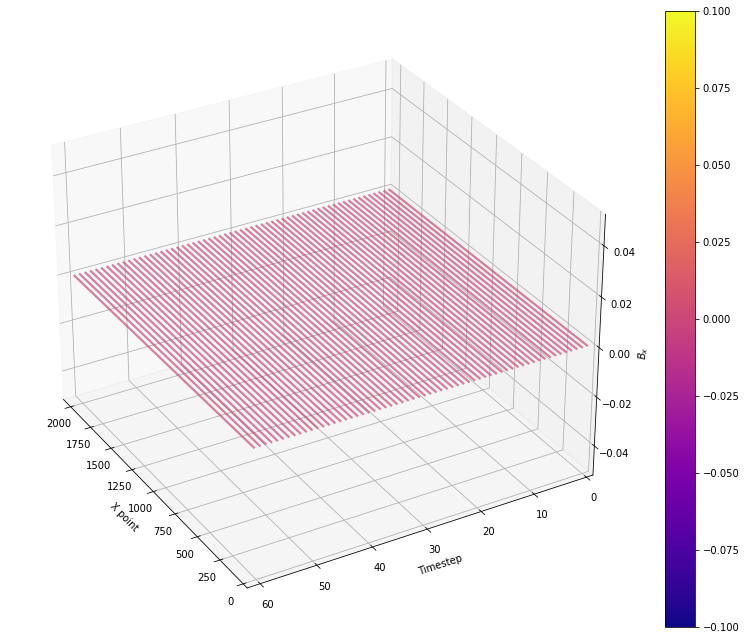

In [62]:
choose_file   = specs23          # Choose file betwenn specs21, specs22,...

quant         = 4                #  Choose between 0,1,...,according to the following list

column        = ['$\rho$', '$V_{x}$', '$V_{y}$', '$V_{z}$','$B_{x}$', '$B_{y}$','$B_{z}$','$Temperature$']


choose_column = choose_file[column[quant]] 
                               
resolution    = len(specs50)                                    # Specify resolution of grid in MHD simulation

t_steps       = int(len(choose_column)/resolution)              # Specify number of timesteps in MHD simulation
zmax1         = 0                                               # Maximum or not?
zmax          = 5                                               # Maximum allowed value of selected quantity
zlog          = 0                                               # Log z axis =1

save_3D_movie = False

if resolution == 2048:
    save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_2048\final\_3d_bx%d.jpg' ## change here
else:
    save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_1024\final\_3d_bx%d.jpg' ## change here 



threeD_plot(choose_column,quant,resolution,t_steps,zmax1,zmax,zlog,save_3D_movie,save_folder,elev=30., azim=150)



##  $Evolution  \ of  \ B_{y}(x,t)$

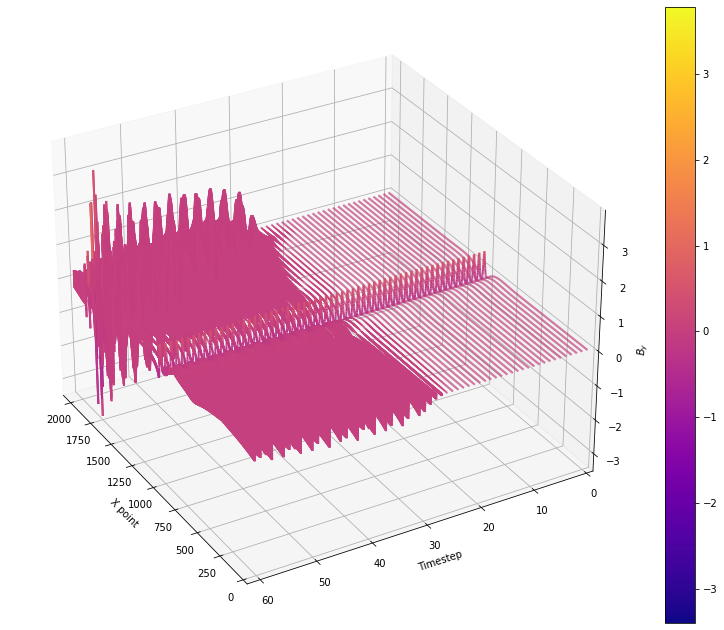

In [63]:
choose_file   = specs23          # Choose file betwenn specs21, specs22,...

quant         = 5               #  Choose between 0,1,...,according to the following list

column        = ['$\rho$', '$V_{x}$', '$V_{y}$', '$V_{z}$','$B_{x}$', '$B_{y}$','$B_{z}$','$Temperature$']


choose_column = choose_file[column[quant]] 
                               
resolution    = len(specs50)                                    # Specify resolution of grid in MHD simulation

t_steps       = int(len(choose_column)/resolution)              # Specify number of timesteps in MHD simulation
zmax1         = 0                                               # Maximum or not?
zmax          = 5                                               # Maximum allowed value of selected quantity
zlog          = 0                                               # Log z axis =1

save_3D_movie = False

if resolution == 2048:
    save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_2048\final\_3d_by%d.jpg' ## change here
else:
    save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_1024\final\_3d_by%d.jpg' ## change here 

threeD_plot(choose_column,quant,resolution,t_steps,zmax1,zmax,zlog,save_3D_movie,save_folder,elev=30., azim=150)



##  $Evolution  \ of  \ B_{z}(x,t)$

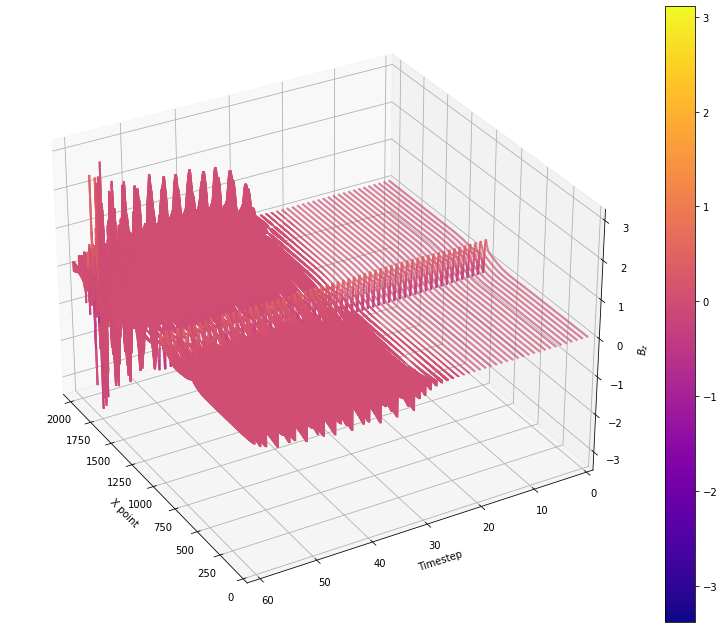

In [64]:
choose_file   = specs23          # Choose file betwenn specs21, specs22,...

quant         = 6               #  Choose between 0,1,...,according to the following list

column        = ['$\rho$', '$V_{x}$', '$V_{y}$', '$V_{z}$','$B_{x}$', '$B_{y}$','$B_{z}$','$Temperature$']


choose_column = choose_file[column[quant]] 
                               
resolution    = len(specs50)                                            # Specify resolution of grid in MHD simulation

t_steps       = int(len(choose_column)/resolution)              # Specify number of timesteps in MHD simulation
zmax1         = 0                                               # Maximum or not?
zmax          = 5                                               # Maximum allowed value of selected quantity
zlog          = 0                                               # Log z axis =1

save_3D_movie = False

if resolution == 2048:
    save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_2048\final\_3d_bz%d.jpg' ## change here
else:
    save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_1024\final\_3d_bz%d.jpg' ## change here 



threeD_plot(choose_column,quant,resolution,t_steps,zmax1,zmax,zlog,save_3D_movie,save_folder,elev=30., azim=150)



##  $Evolution  \ of  \ T(x,t)$

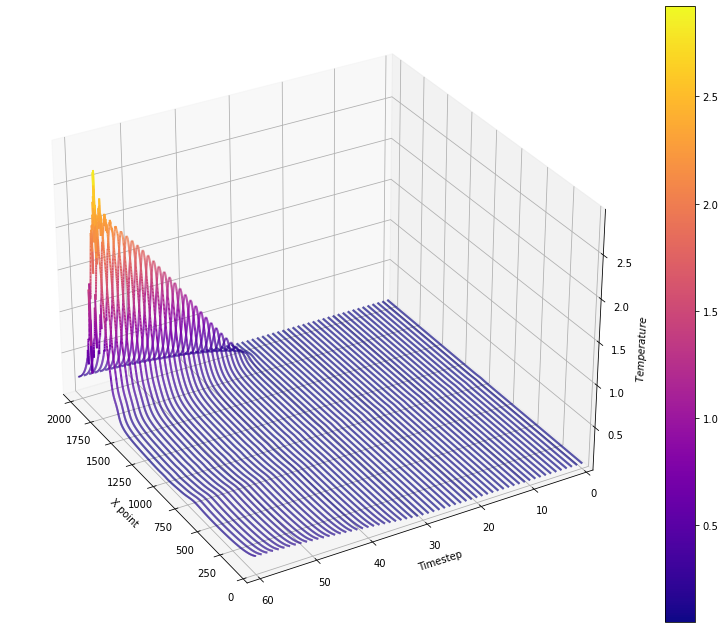

In [65]:
choose_file   = specs23          # Choose file betwenn specs21, specs22,...

quant         = 7               #  Choose between 0,1,...,according to the following list

column        = ['$\rho$', '$V_{x}$', '$V_{y}$', '$V_{z}$','$B_{x}$', '$B_{y}$','$B_{z}$','$Temperature$']


choose_column = choose_file[column[quant]] 
                               
resolution    = len(specs50)                                           # Specify resolution of grid in MHD simulation

t_steps       = int(len(choose_column)/resolution)              # Specify number of timesteps in MHD simulation
zmax1         = 0                                               # Maximum or not?
zmax          = 5                                               # Maximum allowed value of selected quantity
zlog          = 0                                               # Log z axis =1

save_3D_movie = False
if resolution == 2048:
    save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_2048\final\_3d_Temp%d.jpg' ## change here
else:
    save_folder    = r'C:\Users\nikos.000\MHD1D\figures\jpg\res_1024\final\_3d_Temp%d.jpg' ## change here 

threeD_plot(choose_column,quant,resolution,t_steps,zmax1,zmax,zlog,save_3D_movie,save_folder,elev=30., azim=150)

